In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [29]:
df = pd.read_csv('../Datasets/Digit Recognition/train.csv')
df_test = pd.read_csv('../Datasets/Digit Recognition/test.csv')
df.shape,df_test.shape

((42000, 785), (28000, 784))

In [30]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
X = df.drop('label',axis = 1) #contains the pixels of each image
y = df['label'] #contains the numbers from 0 to 9

In [32]:
X.shape

(42000, 784)

In [33]:
y.shape

(42000,)

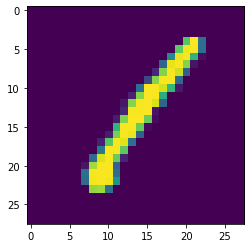

In [34]:
# to convert 1st image into 28 by 28 array and divided by 255 to do normalization using min-max scaling directly as 255 is the max value pixel can have
image0 = X.iloc[0,:].values.reshape(28,28)/255
plt.imshow(image0)

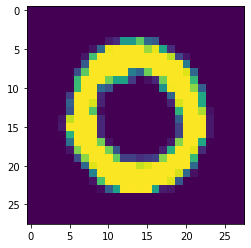

In [35]:
image1 = X.iloc[1,:].values.reshape(28,28)/255
plt.imshow(image1)

In [36]:
def show_digit(X,index):
    image = X.iloc[index,:].values.reshape(28,28)/255
    plt.imshow(image)

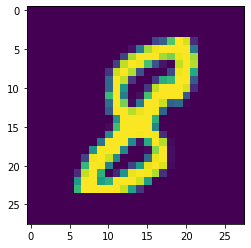

In [37]:
show_digit(X,512)

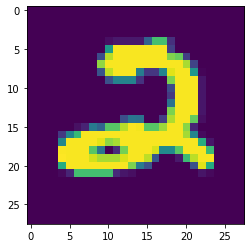

In [38]:
show_digit(df_test,0)

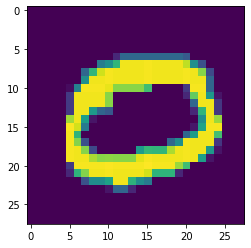

In [39]:
show_digit(df_test,1)

In [40]:
from tensorflow.keras.utils import to_categorical

In [41]:
y_train = to_categorical(y,num_classes=10)
y_train.shape

(42000, 10)

In [42]:
y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

# Model Building

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [44]:
model = Sequential()
model.add(Dense(16,activation='relu',input_shape=(784,)))
model.add(Dense(16,activation='relu'))
model.add(Dense(10,activation='softmax'))  # output is based on probability based
model.compile(loss='categorical_crossentropy')

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                12560     
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 10)                170       
                                                                 
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [46]:
X = X/255

In [47]:
model.fit(X,y_train,epochs = 20,batch_size = 64)

Epoch 1/20
657/657 [==============================] - 2s 2ms/step - loss: 0.5786
Epoch 2/20
657/657 [==============================] - 1s 2ms/step - loss: 0.2868
Epoch 3/20
657/657 [==============================] - 1s 2ms/step - loss: 0.2506
Epoch 4/20
657/657 [==============================] - 1s 2ms/step - loss: 0.2279
Epoch 5/20
657/657 [==============================] - 1s 2ms/step - loss: 0.2094
Epoch 6/20
657/657 [==============================] - 1s 2ms/step - loss: 0.1959
Epoch 7/20
657/657 [==============================] - 1s 2ms/step - loss: 0.1848
Epoch 8/20
657/657 [==============================] - 1s 2ms/step - loss: 0.1771
Epoch 9/20
657/657 [==============================] - 1s 2ms/step - loss: 0.1681
Epoch 10/20
657/657 [==============================] - 1s 2ms/step - loss: 0.1626
Epoch 11/20
657/657 [==============================] - 1s 2ms/step - loss: 0.1556
Epoch 12/20
657/657 [==============================] - 1s 2ms/step - loss: 0.1524
Epoch 13/20
657/657 [====

In [48]:
q = df_test.iloc[1].values.reshape(1,784)/255
model.predict(q).argmax()

0

In [49]:
def predict_digit(index):
    q = df_test.iloc[index].values.reshape(1,784)/255
    return model.predict(q).argmax()

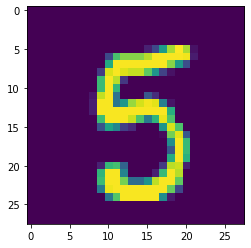

In [50]:
show_digit(df_test,10)

In [51]:
predict_digit(103)

0

# Activation functions

## for output layers we can use following activation functions

#### 1. Regression: Linear activation
#### 2. Binary Classification : sigmoid
#### 3. Multiclass classification : softmax

## for Hidden layers we can use following activation functions

#### Relu : Fastest, most recommended
#### tanh : 
#### Sigmoid : Slowest

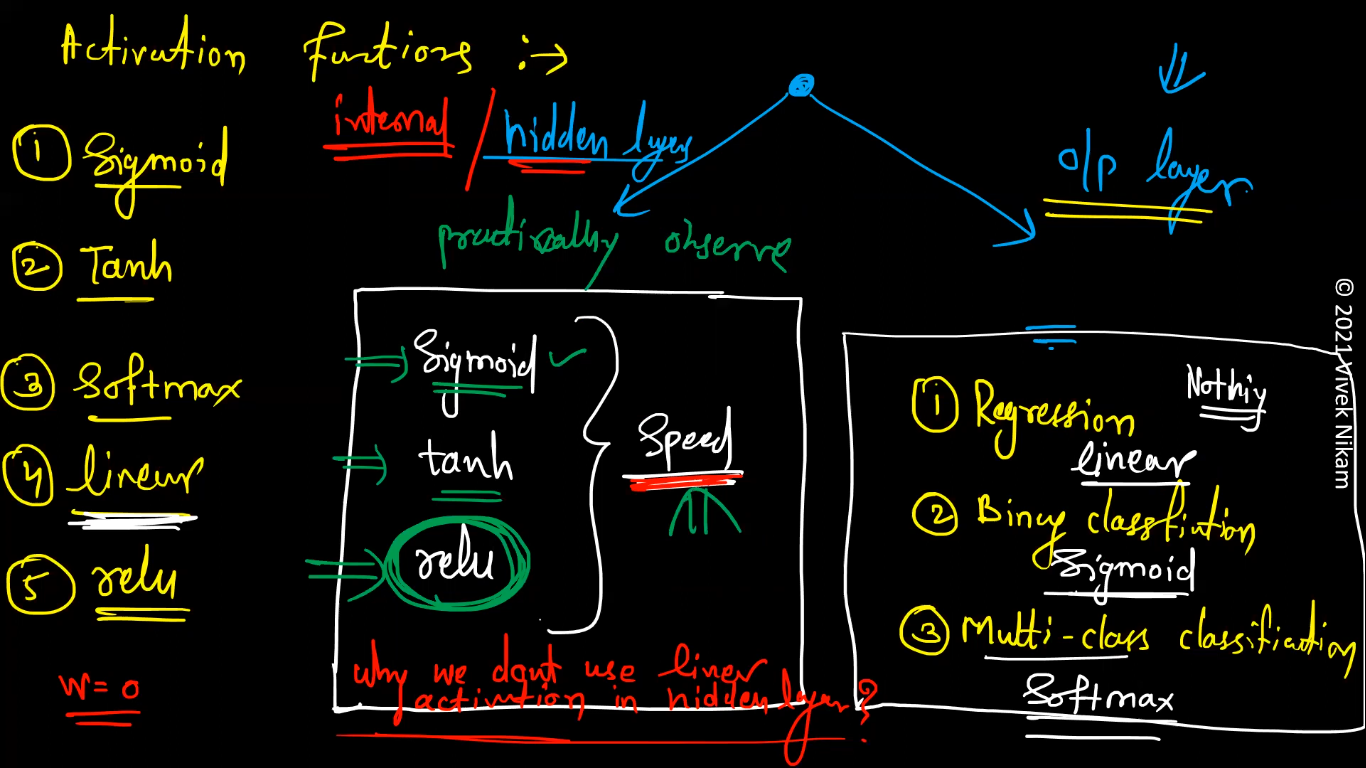

# Handwritten Digit Recognizer

In [52]:
import cv2

In [53]:
img = cv2.imread('../Datasets/Handwritten_Digits/0.png',0)

In [54]:
img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [ 17,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        178, 226, 109,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  78, 167, 249,
        221, 255, 255, 219, 102,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 129, 255, 255, 255,
        255, 255, 255, 255, 255, 111,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [55]:
img.shape

(28, 28)

In [56]:
img = cv2.resize(img,(28,28))/255

In [57]:
img

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.06666667, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.04313725, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [60]:
model.predict(img.reshape(1,784)).argmax()

0

In [91]:
def predict_hand_digit(path):
    img = cv2.imread(path,0)
    img = cv2.resize(img,(28,28))/255
    y = model.predict_on_batch(img.reshape(1,784)).argmax()
    return y    

In [92]:
predict_hand_digit('../Datasets/Handwritten_Digits/1.png')

1

In [93]:
import os

In [94]:
files = os.listdir('../Datasets/Handwritten_Digits')

In [95]:
for file in files:
    y = predict_hand_digit('../Datasets/Handwritten_Digits/'+file)
    print(f'{file} is predicted as {y}')

0.png is predicted as 0
1.png is predicted as 1
2.png is predicted as 2
3.png is predicted as 2
4.png is predicted as 4
5.png is predicted as 3
6.png is predicted as 6
7.png is predicted as 2
8.png is predicted as 6
9.png is predicted as 3


## This is the final code for Digit Recognition